In [1]:
import pandas, seaborn
from glob import glob
import matplotlib as mpl

In [2]:
def get_data(glob_pattern):
    fnames = glob(glob_pattern)

    df = None
    for fname in fnames:
        id_query,endpoint = fname.split(".")[:2]
        id, query = id_query.split("-")
        timings_data = pandas.read_csv(fname, sep=',', header=0).melt(var_name='clock', value_name='time (s)')
    
        timings_data['query'] = query.replace("_", " ")
        timings_data['endpoint'] = endpoint

        if df is None:
            df = timings_data
        else:
            df = pandas.concat([df, timings_data])
    return df

In [6]:
data = get_data("saved_runs/20241210T091800/??-*.*.timings.csv")

In [15]:
data

,clock,time (s),query,endpoint
0,Wall (s),1.85,group by attribute sort,ontop
1,Wall (s),1.92,group by attribute sort,ontop
2,Wall (s),1.98,group by attribute sort,ontop
3,Wall (s),1.92,group by attribute sort,ontop
4,Wall (s),1.82,group by attribute sort,ontop
...,...,...,...,...
85,Sys (s),0.52,filter regex sort,fuseki
86,Sys (s),0.42,filter regex sort,fuseki
87,Sys (s),0.46,filter regex sort,fuseki
88,Sys (s),0.48,filter regex sort,fuseki


In [40]:
seaborn.catplot?

Signature:
seaborn.catplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    kind='strip',
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    col_wrap=None,
    height=5,
    aspect=1,
    log_scale=None,
    native_scale=False,
    formatter=None,
    orient=None,
    color=None,
    palette=None,
    hue_norm=None,
    legend='auto',
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None,
    ci=<deprecated>,
    **kwargs,
)
Docstring:
Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations. The `kind`
parameter selects the underlying axes-level function t

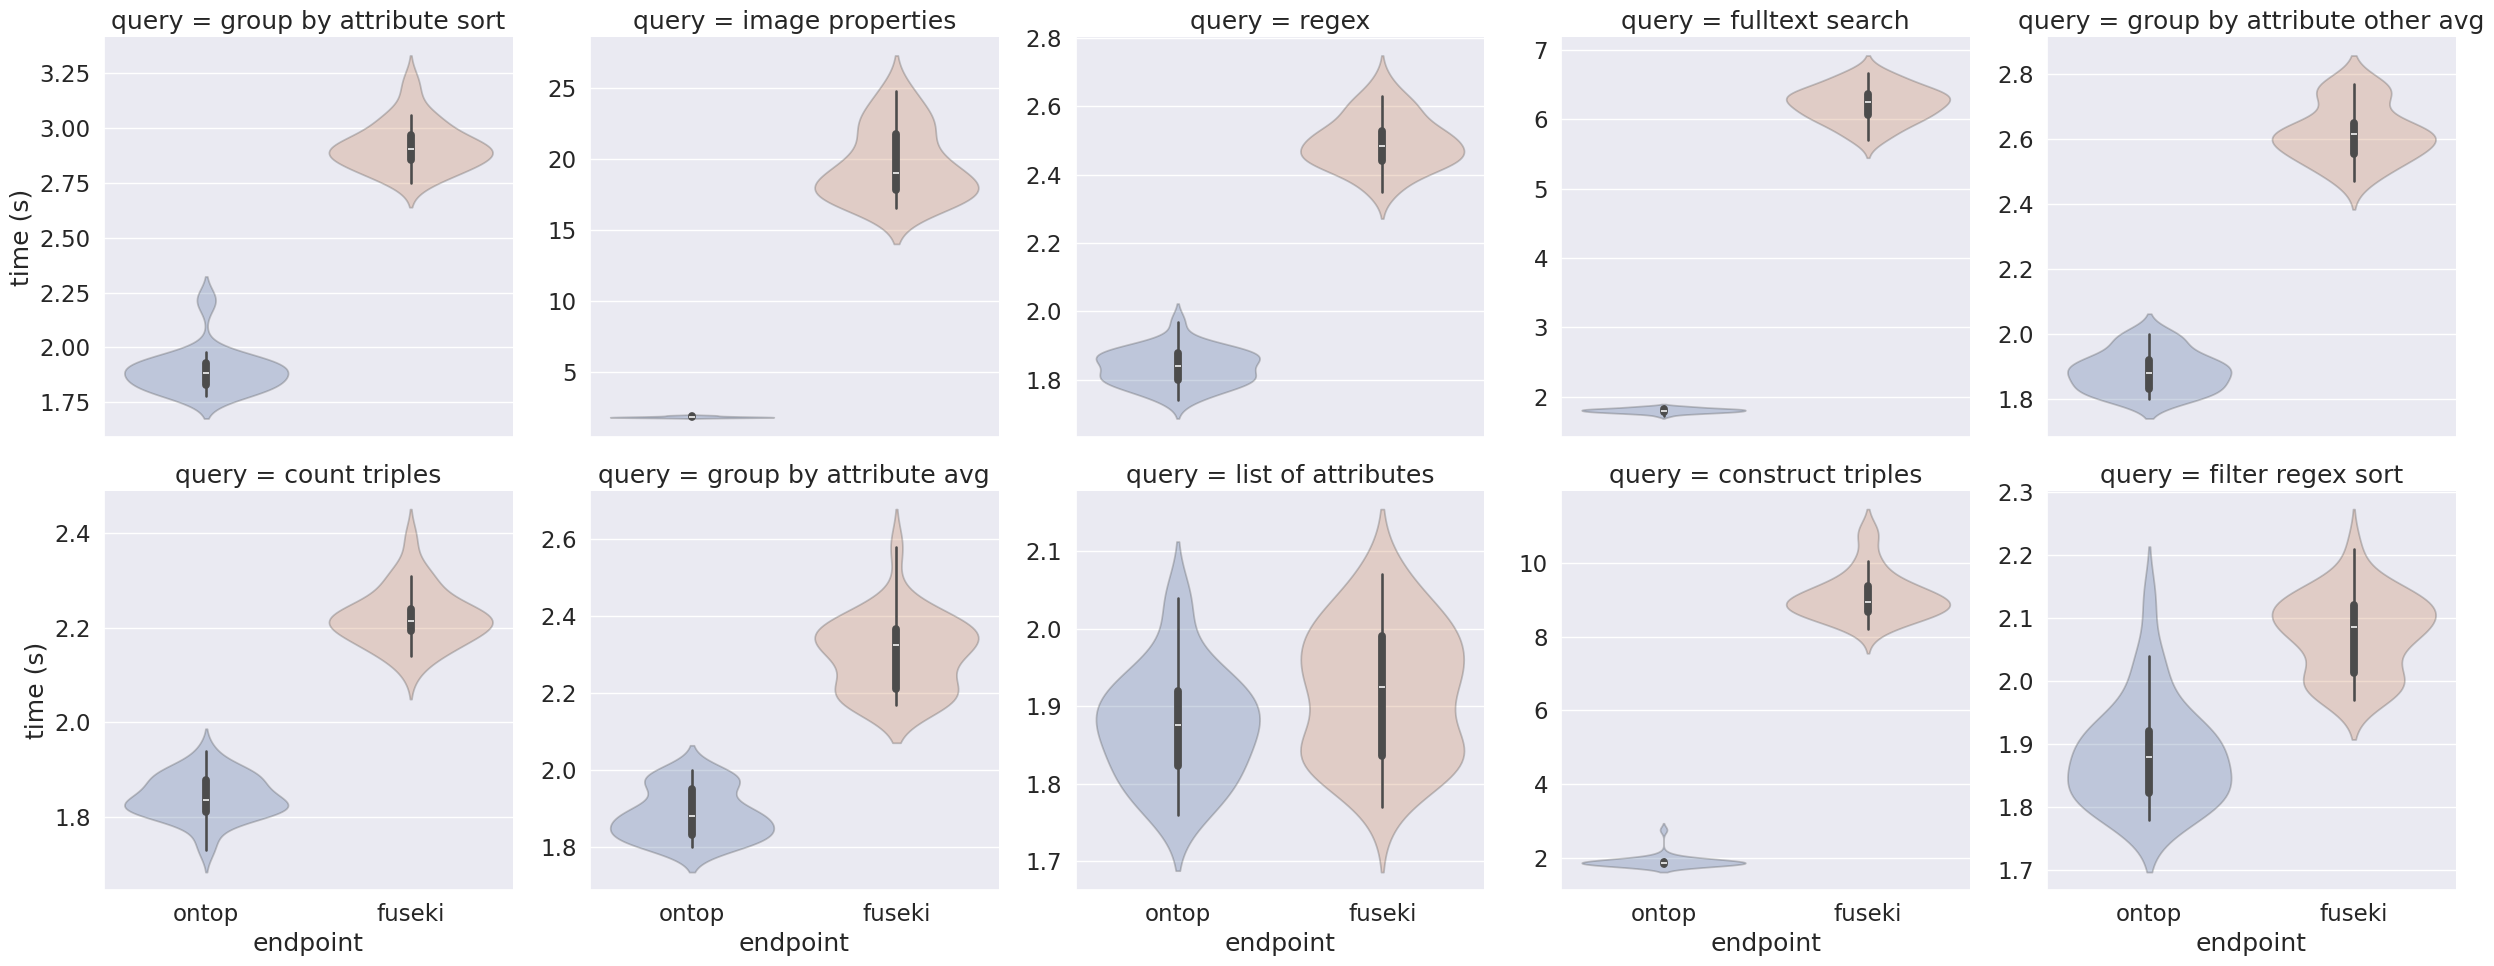

In [49]:
seaborn.set(font_scale=1.5)
seaborn.catplot(kind='violin', data=data[data.clock=='Wall (s)'], x='endpoint', y='time (s)', hue='endpoint', col='query', alpha=0.3, sharey=False, legend='auto', col_wrap=5) 
mpl.pyplot.savefig("saved_runs/20241210T091800/facet_walltime.png")

<Axes: xlabel='query', ylabel='time (s)'>

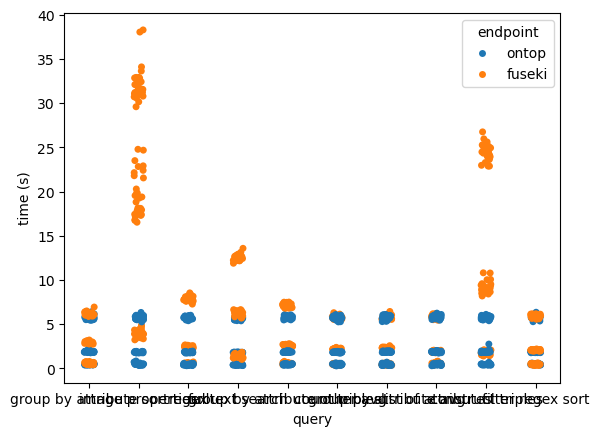

In [19]:
seaborn.stripplot(data=data, x='query', y='time (s)', hue='endpoint')

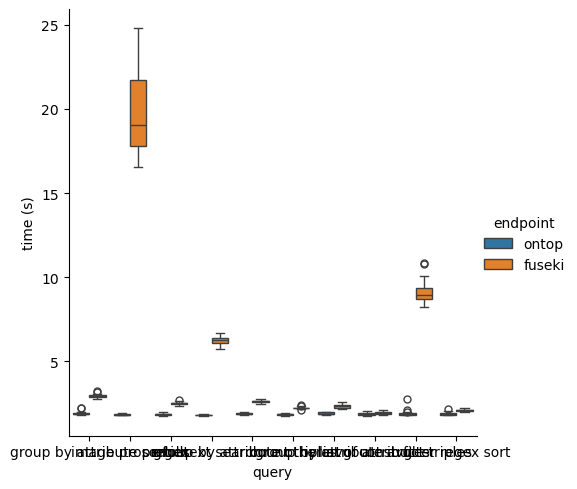

In [30]:
seaborn.catplot(kind='box',data=data[data.clock=='Wall (s)'], x='query', y='time (s)', hue='endpoint')

In [ ]:
ax.set_xlabel('')
ax.set_ylabel('time')
ax.set_title("Query "+DATASET.replace("_", " ").replace("-", ": "))

NameError: name 'ax' is not defined

Text(0.5, 1.0, 'Query 01: list of attributes')

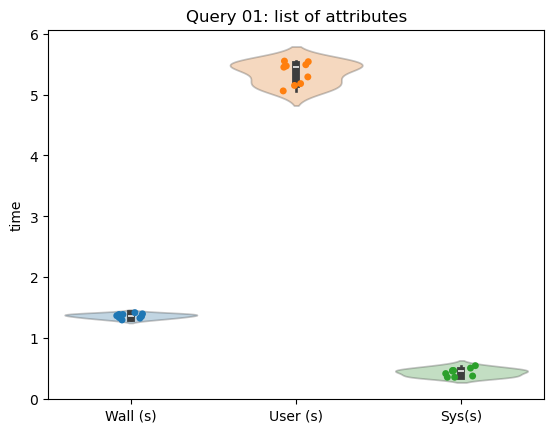

In [38]:
fig, ax = mpl.pyplot.subplots()
seaborn.violinplot(data=timings_data.melt(), x='variable', y='value', hue='variable', alpha=0.3, ax=ax)
seaborn.stripplot(data=timings_data.melt(), x='variable', y='value', hue='variable', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('time')
ax.set_title("Query "+DATASET.replace("_", " ").replace("-", ": "))

In [ ]:
Wall (s),User (s),Sys(s)
1.43,5.53,0.36
1.40,5.50,0.39
1.37,5.53,0.41
1.37,5.37,0.42
1.36,5.57,0.40
1.38,5.23,0.47
1.38,5.52,0.46
1.38,5.54,0.43
1.38,5.60,0.39
